In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
#%matplotlib inline

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/song_data_final.csv')
print(df.head())
df.describe().T
df.head(1000)

   Unnamed: 0                   Title             Artist    Top Genre  Year  \
0           0                 Sunrise        Norah Jones          pop  2004   
1           1             Black Night        Deep Purple         rock  2000   
2           2          Clint Eastwood           Gorillaz  hip hop/rap  2001   
3           3           The Pretender       Foo Fighters  alternative  2007   
4           4  Waitin' On A Sunny Day  Bruce Springsteen         rock  2002   

   BPM  Energy  Danceability  Loudness_db  Liveness  ...  Genre_latin  \
0  157      30            53          -14        11  ...            0   
1  135      79            50          -11        17  ...            0   
2  168      69            66           -9         7  ...            0   
3  173      96            43           -4         3  ...            0   
4  106      82            58           -5        10  ...            0   

   Genre_mellow gold  Genre_metal  Genre_opera  Genre_pop  Genre_punk  \
0            

,Unnamed: 0,Title,Artist,Top Genre,Year,BPM,Energy,Danceability,Loudness_db,Liveness,...,Genre_latin,Genre_mellow gold,Genre_metal,Genre_opera,Genre_pop,Genre_punk,Genre_reggae,Genre_rock,Genre_singer-songwriter,Genre_soul
0,0,Sunrise,Norah Jones,pop,2004,157,30,53,-14,11,...,0,0,0,0,1,0,0,0,0,0
1,1,Black Night,Deep Purple,rock,2000,135,79,50,-11,17,...,0,0,0,0,0,0,0,1,0,0
2,2,Clint Eastwood,Gorillaz,hip hop/rap,2001,168,69,66,-9,7,...,0,0,0,0,0,0,0,0,0,0
3,3,The Pretender,Foo Fighters,alternative,2007,173,96,43,-4,3,...,0,0,0,0,0,0,0,0,0,0
4,4,Waitin' On A Sunny Day,Bruce Springsteen,rock,2002,106,82,58,-5,10,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,Show Me The Way,Peter Frampton,rock,1975,130,73,70,-8,10,...,0,0,0,0,0,0,0,1,0,0
996,996,Meeting Across the River,Bruce Springsteen,rock,1975,105,29,46,-10,18,...,0,0,0,0,0,0,0,1,0,0
997,997,Love Is The Drug,Roxy Music,rock,1975,125,76,84,-5,3,...,0,0,0,0,0,0,0,1,0,0
998,998,Still Crazy After All These Years,Paul Simon,rock,1975,37,25,27,-12,9,...,0,0,0,0,0,0,0,1,0,0


In [8]:
df=df.drop(columns=[ "Title", "Artist", "Top Genre"], axis = 1)

In [9]:
X = df[df.columns.difference(['popularity'])]
y = pd.cut(x=df["Popularity"], bins=[-1,42,100], labels=[0,1])

In [10]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
X_train.shape, X_test.shape

((1396, 43), (599, 43))

In [11]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)
# checking the oob score
classifier_rf.oob_score_

0.9835243553008596

In [12]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
#%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [13]:
print(grid_search.best_score_)
rf_best = grid_search.best_estimator_
rf_best

1.0


RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=30,
                       n_jobs=-1, random_state=42)

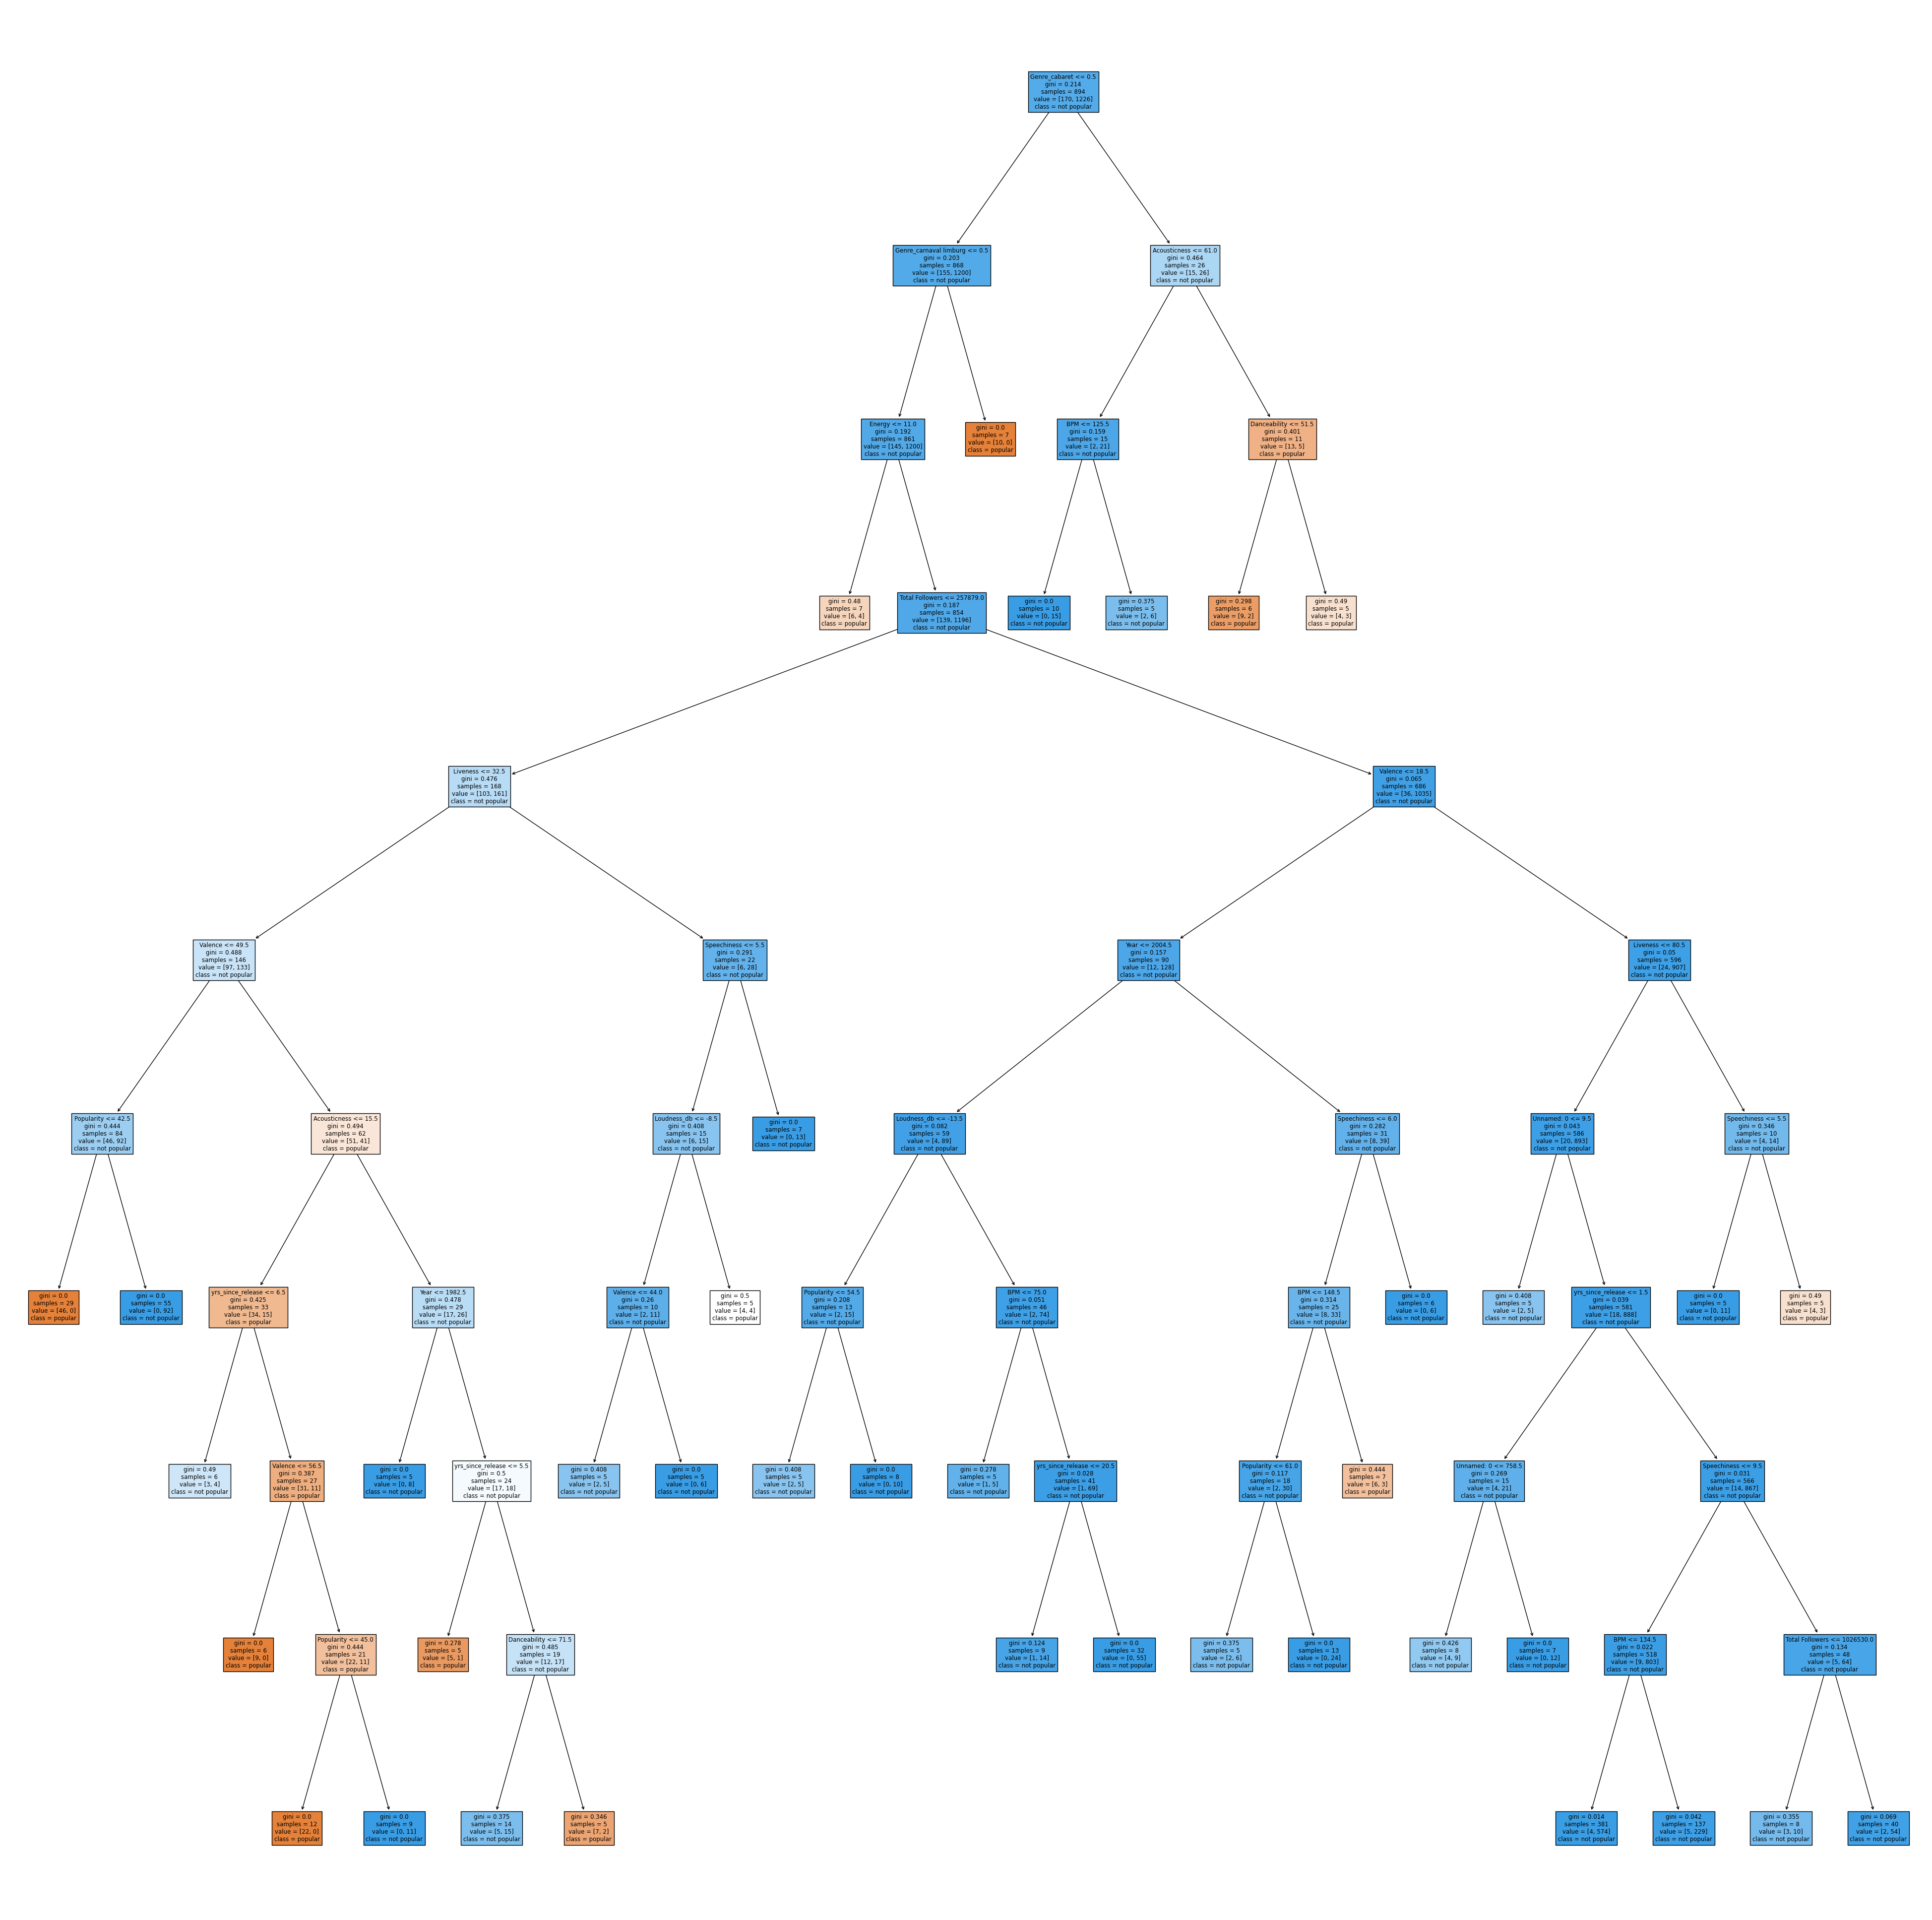

In [15]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,50))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['popular', "not popular"],filled=True);

In [16]:
rf_best.feature_importances_

array([1.27138908e-02, 9.94992946e-03, 1.25023380e-02, 1.14406631e-02,
       1.93804522e-02, 2.69528982e-04, 9.23910493e-04, 0.00000000e+00,
       2.65468425e-03, 1.53076163e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.23098498e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 8.63846961e-05, 1.75926769e-07, 0.00000000e+00,
       2.77163516e-05, 3.88860452e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.30031554e-03,
       0.00000000e+00, 0.00000000e+00, 2.77199629e-03, 0.00000000e+00,
       2.63944977e-04, 2.79459062e-02, 8.69528874e-03, 6.33294063e-01,
       6.09044674e-03, 1.11085697e-01, 1.76393046e-02, 1.77851631e-02,
       3.10750620e-02, 5.77519508e-03, 1.19111829e-02])

In [17]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
35,Popularity,6.332941e-01
37,Total Followers,1.110857e-01
21,Genre_indie,3.888605e-02
40,Year,3.107506e-02
33,Liveness,2.794591e-02
4,Energy,1.938045e-02
39,Valence,1.778516e-02
38,Unnamed: 0,1.763930e-02
9,Genre_carnaval limburg,1.530762e-02
0,Acousticness,1.271389e-02


Conclusion:
    1. From the observed data, followers and genre are the first two key features for the song to be popular.
    2. liveness and energy of the song also plays major role in the popularity of the song
        so random forest has been genrated using all the features and has given the most important attributes needed for the popularity of the song.